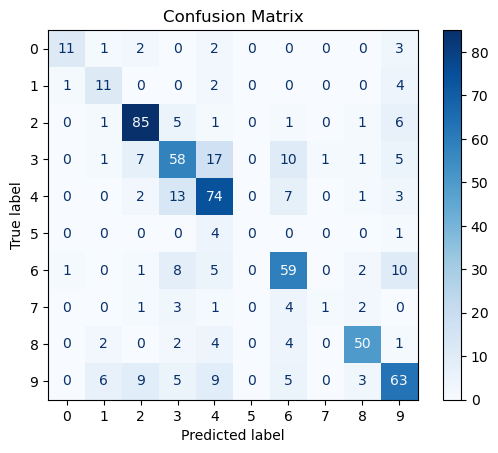

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 读取标签文件
def read_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [int(line.strip()) for line in f]
    return labels

# 主函数
def main(ref_file, pred_file):
    # 读取ref和pred标签
    y_true = read_labels(ref_file)
    y_pred = read_labels(pred_file)

    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(10))
    
    # 绘制混淆矩阵
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# 调用主函数
ref_file = 'dev_references.txt'
pred_file = 'dev_predictions.txt'
main(ref_file, pred_file)

In [1]:
import json

# 读取mapping.txt文件
def read_mapping(file_path):
    mapping = {}
    with open(file_path, 'r', encoding='UTF-8') as f:
        for line in f:
            key, value = line.strip().split(': ')
            mapping[int(value)] = key  # 将value转换为int作为键，key作为值
    return mapping

# 读取json文件
def read_json(file_path):
    with open(file_path, 'r', encoding='UTF-8') as f:
        data = json.load(f)
    return data

# 读取pred.txt文件
def read_labels(file_path):
    with open(file_path, 'r', encoding='UTF-8') as f:
        labels = [int(line.strip()) for line in f]
    return labels

# 写入json文件
def write_json(file_path, data):
    with open(file_path, 'w', encoding='UTF-8') as f:
        json.dump(data, f, indent=4)

# 主函数
def main(mapping_file, json_file, pred_file, output_file):
    # 读取mapping和json数据
    mapping = read_mapping(mapping_file)
    json_data = read_json(json_file)
    pred_labels = read_labels(pred_file)

    # 添加classifier_type字段
    count = 0
    for item, label in zip(json_data, pred_labels):
        item["classifier_type"] = mapping[label]
        item['seq_num'] = count
        count += 1

    # 写入更新后的json文件
    write_json(output_file, json_data)

# 调用主函数
mapping_file = '../../angular_filtered/subsets/classification/type_label_mapping.txt'
json_file = '../lemma_dev_test_150.json'
pred_file = 'vdo_dev_test_150_predictions.txt'
output_file = 'test_dev_150_with_classification.json'
main(mapping_file, json_file, pred_file, output_file)